In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install soundfile simpleaudio librosa scipy
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
from scipy.signal import resample


audio_path = "/content/drive/MyDrive/audio.wav"

signal, sr = sf.read(audio_path)





Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for simpleaudio
  Running setup.py clean for simpleaudio
Failed to build simpleaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (simpleaudio)


In [ ]:
from IPython.display import Audio

Audio(data=signal, rate=sr)


In [ ]:
print("Sampling Rate:", sr, "Hz")
print("Number of Samples:", len(signal))
print("Total Duration:", len(signal)/sr, "seconds")
print("Bit Depth: 16-bit PCM (WAV format)")


Sampling Rate: 8000 Hz
Number of Samples: 57344
Total Duration: 7.168 seconds
Bit Depth: 16-bit PCM (WAV format)


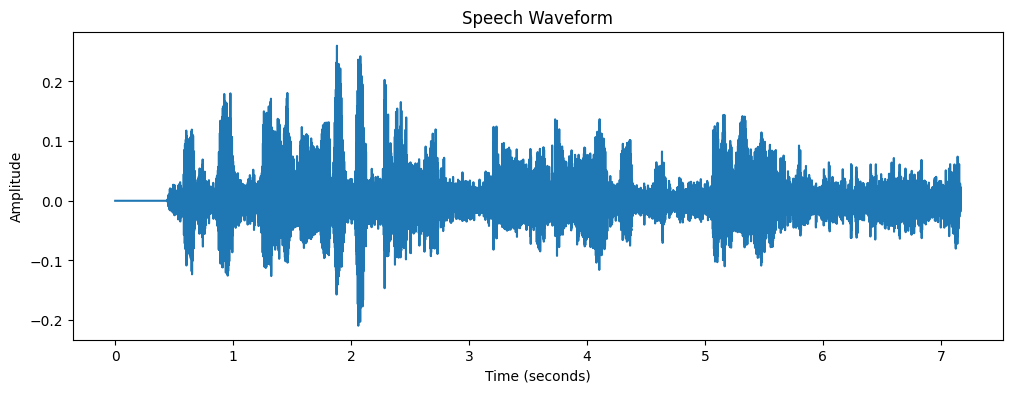

In [ ]:
time = np.arange(len(signal)) / sr

plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Waveform")
plt.show()


In [ ]:
energy = signal ** 2
threshold = 0.0001

active_duration = np.sum(energy > threshold) / sr
print("Active Speech Duration:", active_duration, "seconds")


Active Speech Duration: 4.652375 seconds


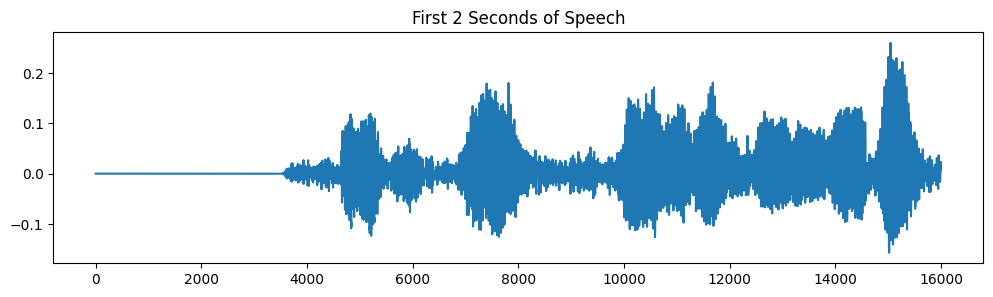

In [ ]:
slice_2s = signal[:2 * sr]

plt.figure(figsize=(12,3))
plt.plot(slice_2s)
plt.title("First 2 Seconds of Speech")
plt.show()


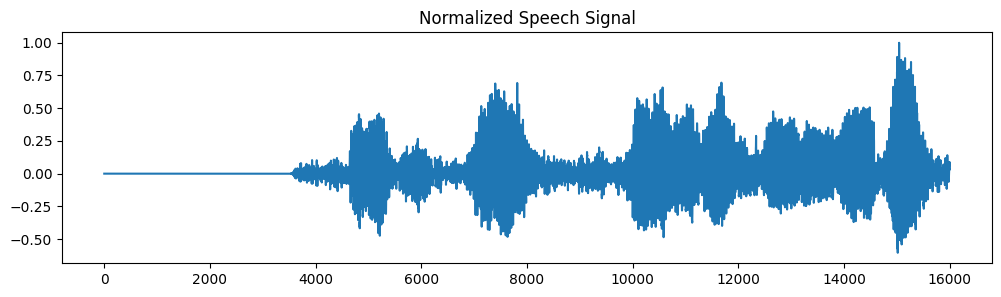

In [ ]:
normalized = slice_2s / np.max(np.abs(slice_2s))

plt.figure(figsize=(12,3))
plt.plot(normalized)
plt.title("Normalized Speech Signal")
plt.show()


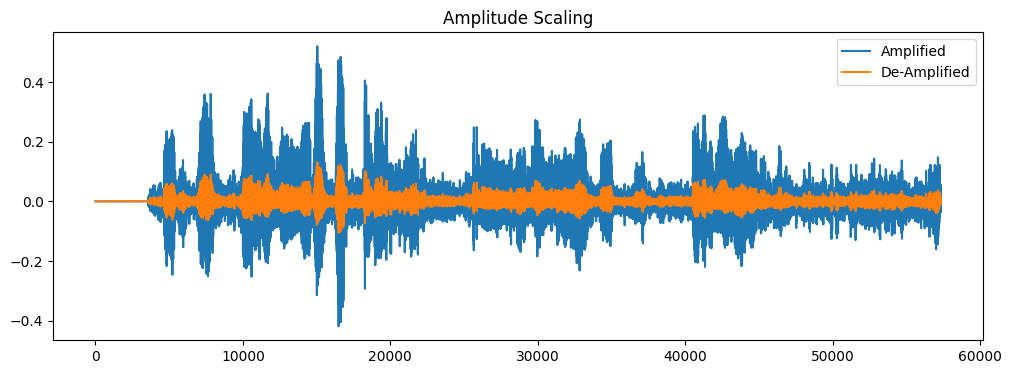

In [ ]:
amplified = signal * 2
deamplified = signal * 0.5

plt.figure(figsize=(12,4))
plt.plot(amplified, label="Amplified")
plt.plot(deamplified, label="De-Amplified")
plt.legend()
plt.title("Amplitude Scaling")
plt.show()


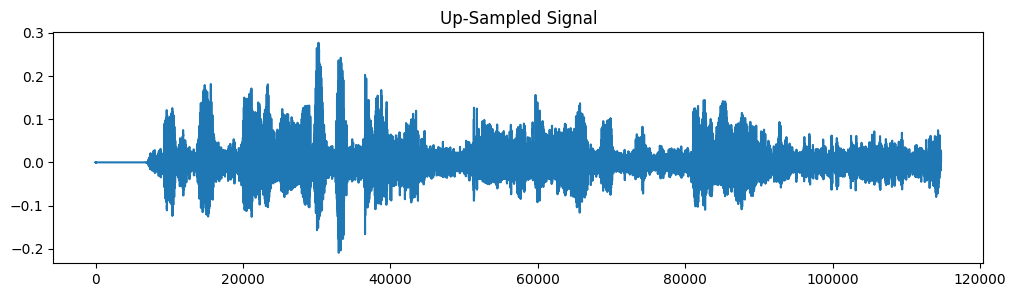

In [ ]:
upsampled = resample(signal, len(signal) * 2)

plt.figure(figsize=(12,3))
plt.plot(upsampled)
plt.title("Up-Sampled Signal")
plt.show()


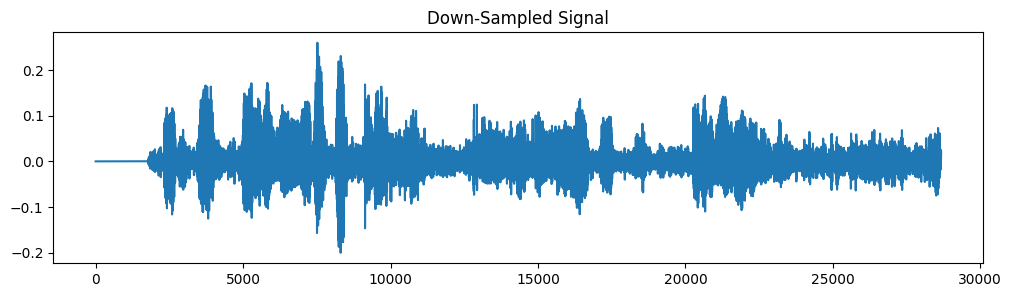

In [ ]:
downsampled = signal[::2]

plt.figure(figsize=(12,3))
plt.plot(downsampled)
plt.title("Down-Sampled Signal")
plt.show()


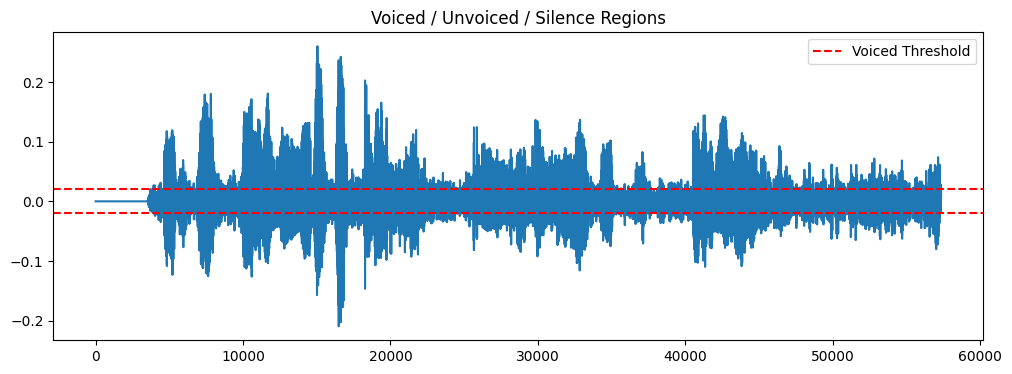

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(signal)
plt.axhline(0.02, color='r', linestyle='--', label="Voiced Threshold")
plt.axhline(-0.02, color='r', linestyle='--')
plt.legend()
plt.title("Voiced / Unvoiced / Silence Regions")
plt.show()
